# P4 - Anticipez le retard de vol des avions

## Récupération et visualisation des données

In [1]:
import pandas as pd
import numpy as np
import datetime
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Quelques options d'affichage
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) 
plt.style.use('default')

# Méthode de suppression de colonne
def DropCol(p_df, p_col):
    if p_col in p_df.columns:
        p_df = p_df.drop([p_col], axis=1)
    return p_df

# Méthode de sauvegarde d'objets en local pour une utilisation par l'API
def save_obj(obj, name):
    fn = '../flightdelay/save/'+ name + '.pkl'
    try:
        # Suppression si existance
        os.remove(fn)
    except OSError:
        pass
    # Sauvegarde
    with open(fn, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
    print(fn, 'saved')

In [2]:
# Récupération du fichier en local
ALLFILES = True
# Les fichiers étant volumineux ils ne sont pas stockés au même endroit que mon projet qui est synchronisé et enregistré (drive et git)
CT_DIR_DATA = 'C:\Work\OpenClassrooms\data\P4/'
filename = '2016_01'
dataraw = pd.read_csv(CT_DIR_DATA + filename + '.csv', error_bad_lines=False)
print(dataraw.shape)

if ALLFILES:
    # Concaténation de toutes les données
    for i in range(2, 13):
        n = CT_DIR_DATA + '2016_%0*d' % (2, i) + '.csv'
        print('reading', n, '...')
        f = pd.read_csv(n, error_bad_lines=False)
        print('shape ', f.shape)
        dataraw = dataraw.append(f, ignore_index=True)
        # Il faut reindexer si on a concaténé les fichiers 
        dataraw.index = range(len(dataraw.index))
print(dataraw.shape)

(445827, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_02.csv ...
shape  (423889, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_03.csv ...


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape  (479122, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_04.csv ...


b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


shape  (479950, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_05.csv ...
shape  (479358, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_06.csv ...
shape  (487637, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_07.csv ...
shape  (502457, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_08.csv ...
shape  (498347, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_09.csv ...
shape  (454878, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_10.csv ...
shape  (472626, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_11.csv ...
shape  (450938, 65)
reading C:\Work\OpenClassrooms\data\P4/2016_12.csv ...
shape  (460949, 65)
(5635978, 65)


In [3]:
dataraw.head(10)

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1057,-3.0,0.0,0.0,-1.0,1100-1159,15,1112.0,1424.0,8.0,1438.0,1432,-6.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,155.0,132.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1056,-4.0,0.0,0.0,-1.0,1100-1159,14,1110.0,1416.0,10.0,1438.0,1426,-12.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,126.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1055,-5.0,0.0,0.0,-1.0,1100-1159,21,1116.0,1431.0,14.0,1438.0,1445,7.0,7.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,170.0,135.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1102,2.0,2.0,0.0,0.0,1100-1159,13,1115.0,1424.0,9.0,1438.0,1433,-5.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,151.0,129.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1240,100.0,100.0,1.0,6.0,1100-1159,20,1300.0,1617.0,14.0,1438.0,1631,113.0,113.0,1.0,7.0,1400-1459,0.0,NaN,0.0,158.0,171.0,137.0,1.0,986.0,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN
5,2016,1,1,11,1,2016-01-11,AA,19805,AA,N468AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1107,7.0,7.0,0.0,0.0,1100-1159,11,1118.0,1426.0,9.0,1438.0,1435,-3.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,148.0,128.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016,1,1,12,2,2016-01-12,AA,19805,AA,N4YBAA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1059,-1.0,0.0,0.0,-1.0,1100-1159,14,1113.0,1429.0,9.0,1438.0,1438,0.0,0.0,0.0,0.0,1400-1459,0.0,NaN,0.0,158.0,159.0,136.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016,1,1,13,3,2016-01-13,AA,19805,AA,N569AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1055,-5.0,0.0,0.0,-1.0,1100-1159,12,1107.0,1419.0,12.0,1438.0,1431,-7.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,156.0,132.0,1.0,986.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,1,1,14,4,2016-01-14,AA,19805,AA,N466AA,43,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,11433,1143302,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43.0,1100.0,1058,-2.0,0.0,0.0,-1.0,1100-1159,12,1110.0,1420.0,8.0,1438.0,1428,-10.0,0.0,0.0,-1.0,1400-1459,0.0,NaN,0.0,158.0,150.0,130.0,1.0,986.0,4.0,NaN

### Etude des valeurs manquantes

Text(0.5,1,'Proportion de valeurs absentes')

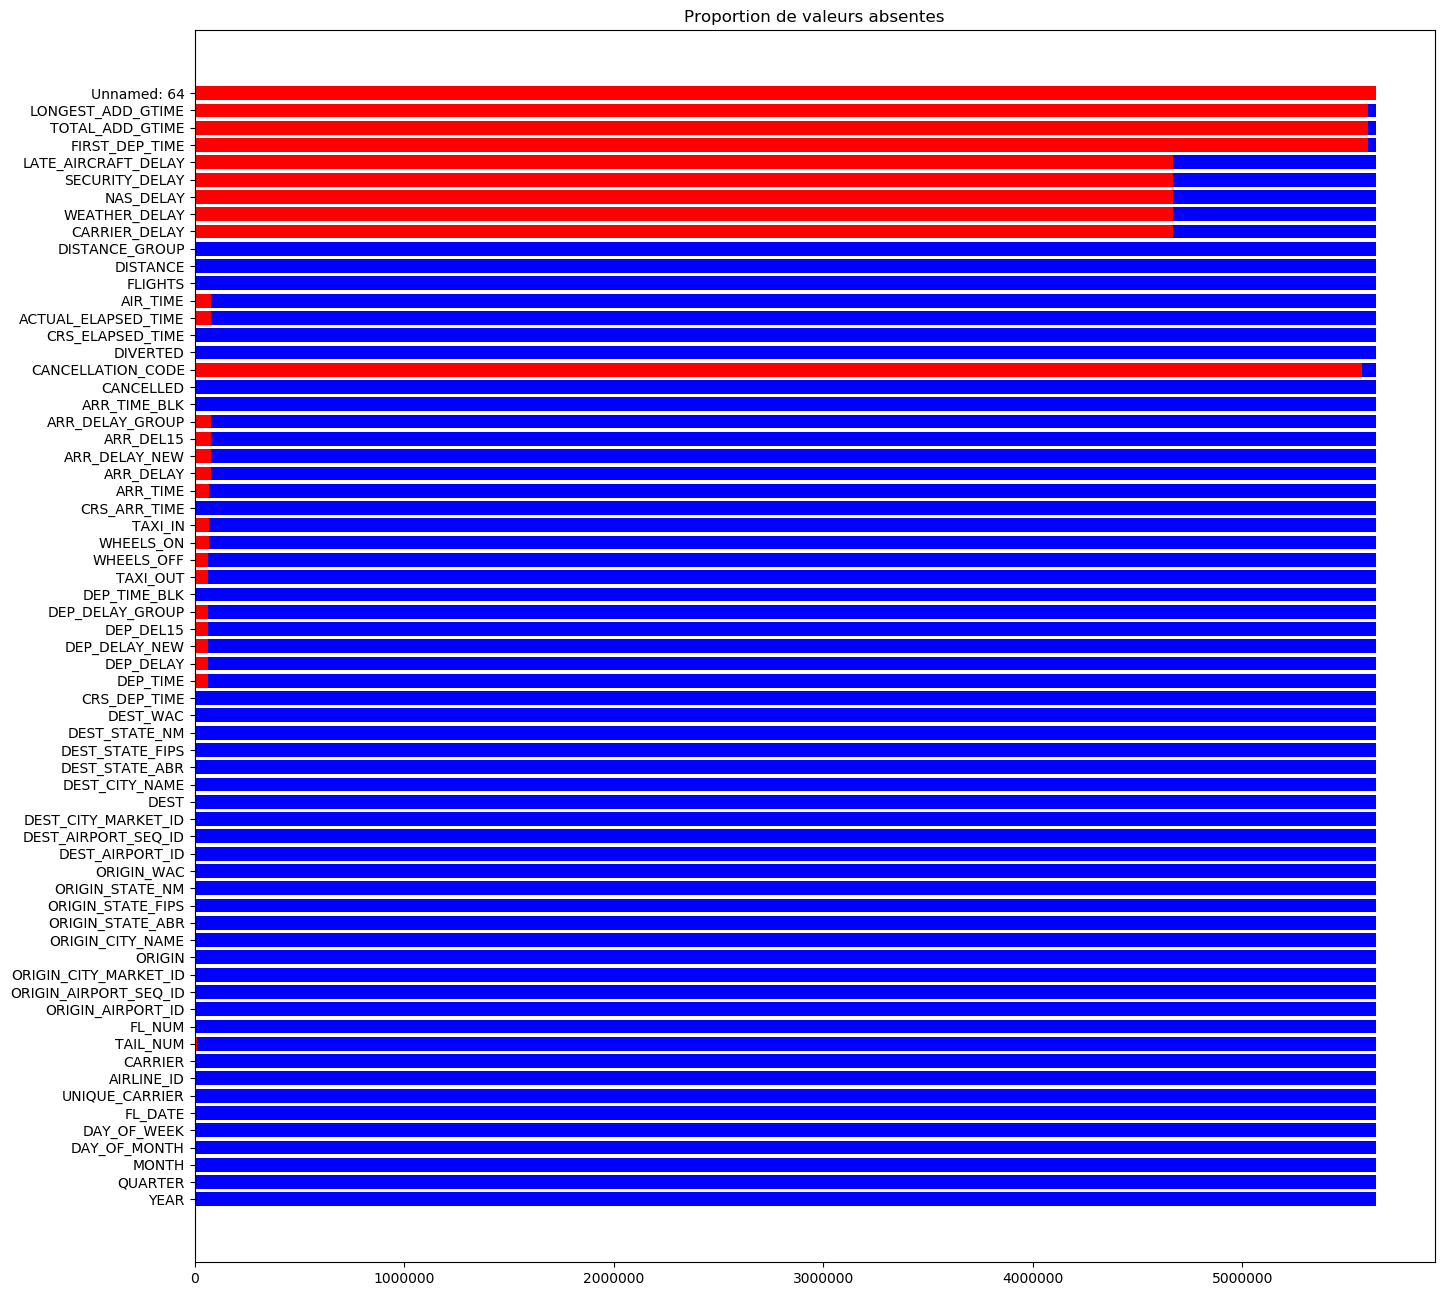

In [4]:
x1=dataraw.isnull().sum().values
x2=dataraw.notnull().sum().values
index = np.arange(len(x1))

fig, ax = plt.subplots(figsize=(16, 16))
plt.barh(index, x1+x2, color='b')
plt.barh(index, x1, color='r')
ax.set_yticks(index)
ax.set_yticklabels(dataraw.columns.values.tolist())

plt.title("Proportion de valeurs absentes")

On peut voir qu'il y a quelques annulations (cancellation_code) et des changements de route (diverted), on peut s'en débarrasser.

In [5]:
# On ne s'occupe pas de certains vols
print(dataraw.CANCELLED.sum(), 'vols annulés')
print(dataraw.DIVERTED.sum(), 'vols détournés')
dataraw = dataraw[dataraw.DIVERTED==0]
dataraw = dataraw[dataraw.CANCELLED==0]
print('Il reste', dataraw.ARR_DELAY.isnull().sum(), 'valeur manquante pour DELAY')

66334.0 vols annulés
14105.0 vols détournés
Il reste 0 valeur manquante pour DELAY


Il n'y a plus de valeurs manquantes pour notre target, on peut continuer.

On peut voir aussi qu'il y a des raisons pour chaque retard (delay) : NAS, WEATHER, CARRIER, SECURITY et LATE_AIRCRAFT, regardons de plus près :

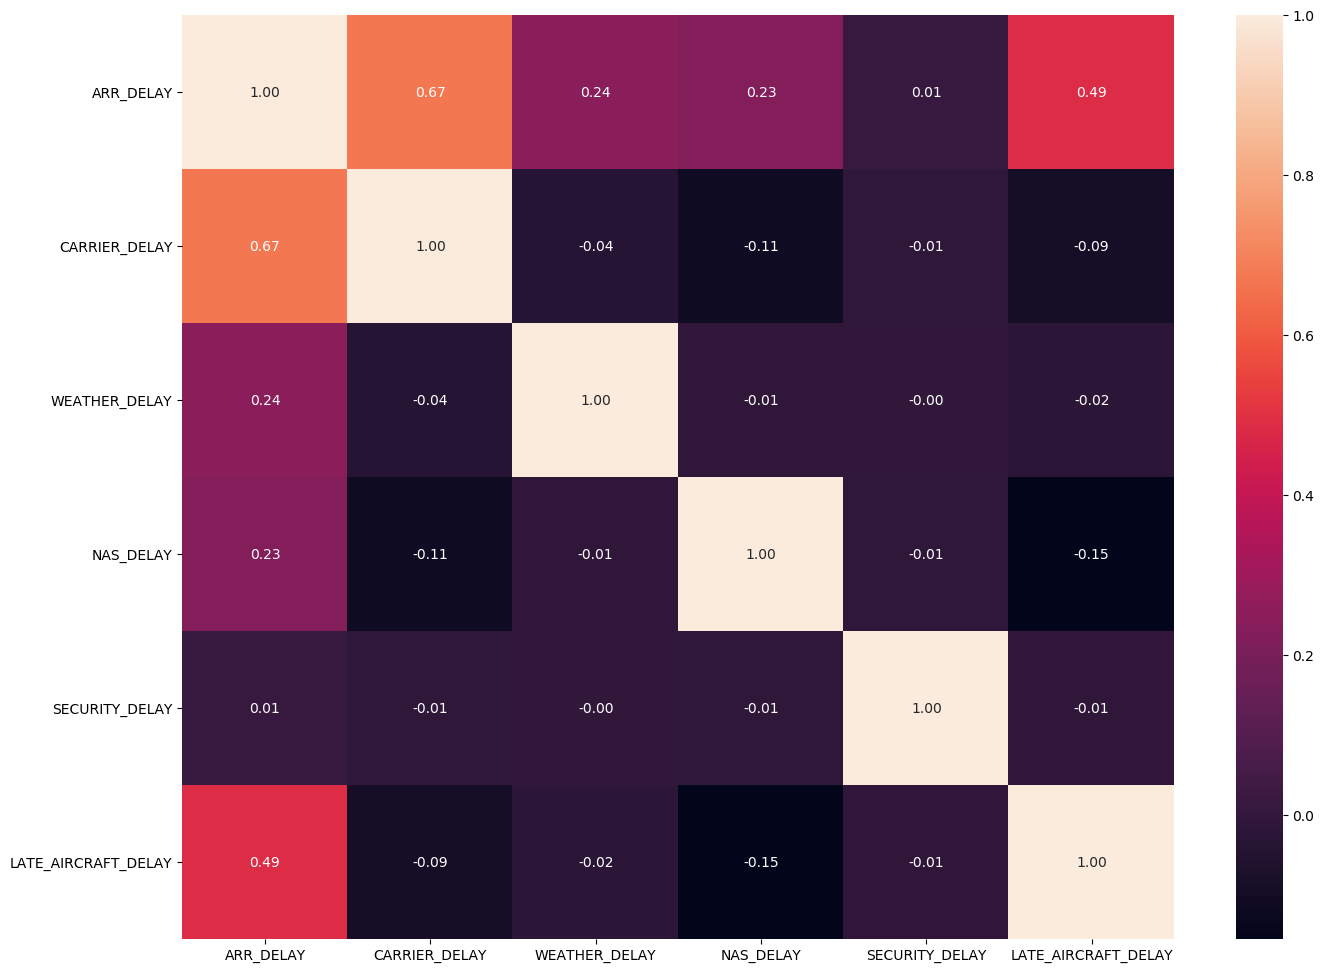

In [6]:
# Avec une Heat Map
cols = ['ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
plt.figure(figsize=(16, 12))
sns.heatmap(dataraw[cols].corr(),annot = True,fmt = ".2f",cbar = True)
plt.show()

On a donc les features principales expliquant les retards, malheureusement on ne peut pas s'en servir en tant qu'utilisateur voulant prévoir à l'avance un éventuel retard de son vol.

Il va falloir faire avec les informations contenues sur le billet.

### Récupération de données pour l'API

In [7]:
# Première visualisation des aéroports
(dataraw[['ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME']].drop_duplicates()).sort_values(['ORIGIN_CITY_NAME'])

,ORIGIN_AIRPORT_ID,ORIGIN_CITY_NAME
176372,10141,"Aberdeen, SD"
2386508,10136,"Abilene, TX"
75518,10165,"Adak Island, AK"
84617,10732,"Aguadilla, PR"
1808970,10874,"Akron, OH"
109082,10874,"Akron, OH"
320976,10146,"Albany, GA"
35946,10257,"Albany, NY"
1808969,10257,"Albany, NY"
1808317,10140,"Albuquerque, NM"


On a des valeurs anormales (GA et 15 pour l'ID) 

Ainsi qu'un mélange de types qui nous donne des doublons

In [8]:
if ALLFILES:
    # Récupération de tous les aéroports
    dataraw = dataraw[dataraw.ORIGIN_AIRPORT_ID != 'GA']
    dataraw.ORIGIN_AIRPORT_ID = dataraw.ORIGIN_AIRPORT_ID.astype(np.int)
    dataraw = dataraw[dataraw.ORIGIN_AIRPORT_ID != 15]

    tmp = (dataraw[['ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME']].drop_duplicates()).sort_values(['ORIGIN_CITY_NAME'])
    print (tmp)

    save_obj(tmp, 'model_airport')
    
    # Récupération de toutes les compagnies
    save_obj(list(sorted(set(dataraw['UNIQUE_CARRIER']))), 'model_carrier')


         ORIGIN_AIRPORT_ID                    ORIGIN_CITY_NAME
176372               10141                        Aberdeen, SD
2386508              10136                         Abilene, TX
75518                10165                     Adak Island, AK
84617                10732                       Aguadilla, PR
1808970              10874                           Akron, OH
320976               10146                          Albany, GA
35946                10257                          Albany, NY
1808317              10140                     Albuquerque, NM
289026               10185                      Alexandria, LA
124418               10135      Allentown/Bethlehem/Easton, PA
176496               10333                          Alpena, MI
136536               10279                        Amarillo, TX
1810461              10299                       Anchorage, AK
108876               10408                        Appleton, WI
161939               10157                   Arcata/Eur

### Choix de nos features

On va devoir faire des choix restreints, en effet un passager avec son billet n'aura que peu d'information à donner

In [6]:
# On garde ORIGIN_CITY_NAME pour la page web
featurescols = ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'CRS_DEP_TIME', 'ARR_DELAY']
dataraw = dataraw[featurescols]

In [7]:
# Pas besoin d'une aussi grande précision, gardons seulement l'heure
if 'CRS_DEP_TIME' in dataraw.columns:
    dataraw['DEP_HOUR'] = (dataraw['CRS_DEP_TIME'] / 100).astype(int)
    dataraw = DropCol(dataraw, 'CRS_DEP_TIME')

In [11]:
dataraw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5556195 entries, 0 to 5635977
Data columns (total 8 columns):
MONTH                int64
DAY_OF_MONTH         object
DAY_OF_WEEK          object
UNIQUE_CARRIER       object
ORIGIN_AIRPORT_ID    object
ORIGIN_CITY_NAME     object
ARR_DELAY            float64
DEP_HOUR             int32
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 360.3+ MB


In [8]:
# On remet quelques types en numérique pour les calculs
dataraw.DAY_OF_WEEK = dataraw.DAY_OF_WEEK.astype(np.int)
dataraw.DAY_OF_MONTH = dataraw.DAY_OF_MONTH.astype(np.int)
dataraw.ORIGIN_AIRPORT_ID = dataraw.ORIGIN_AIRPORT_ID.astype(np.int)

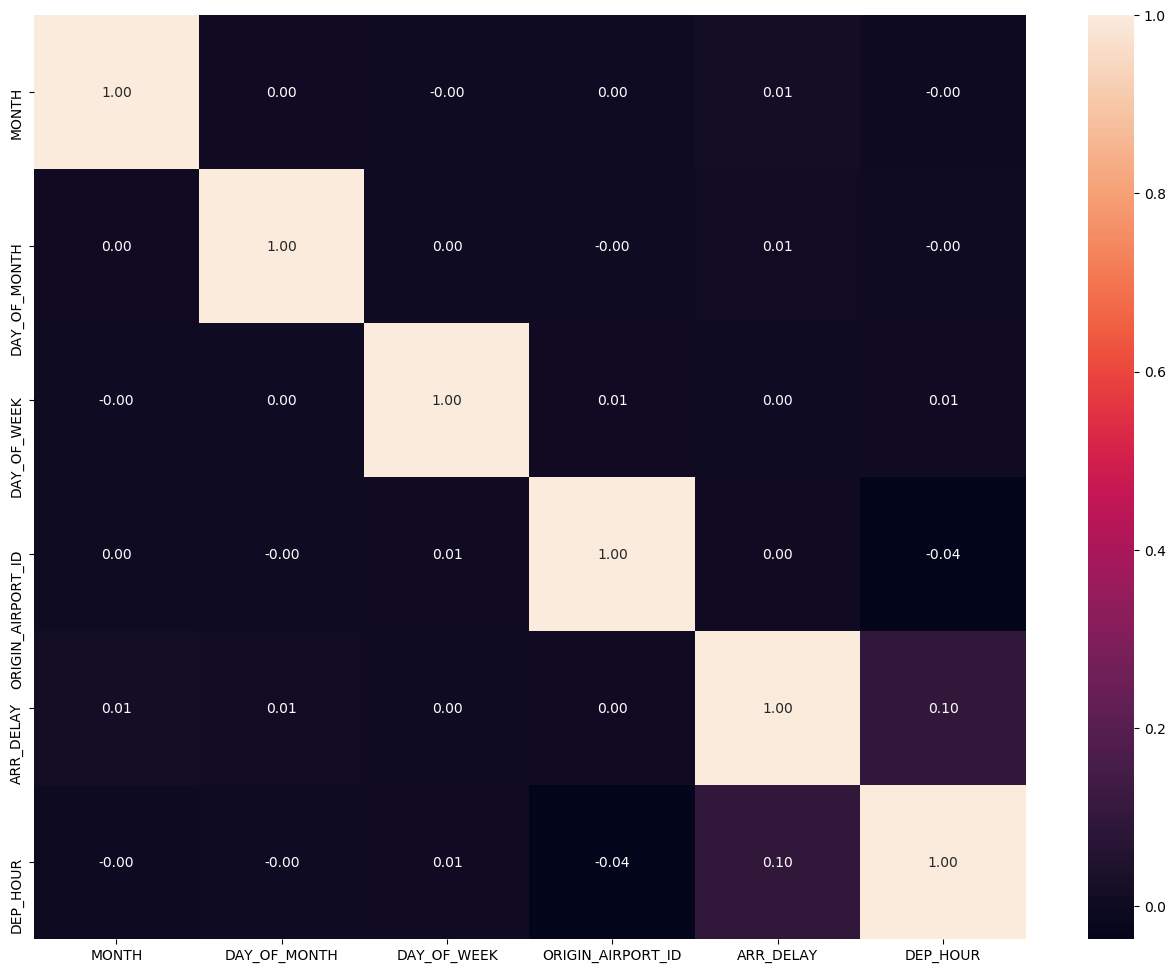

In [13]:
#Correlation Heat Map
plt.figure(figsize=(16, 12))
sns.heatmap(dataraw.corr(), annot = True,fmt = ".2f",cbar = True)
plt.show()

Là c'est clair, la prévision va être difficile à réaliser :(

## Les outliers

In [14]:
dataraw.ARR_DELAY.describe()

count    5.556195e+06
mean     3.536409e+00
std      4.192246e+01
min     -1.520000e+02
25%     -1.400000e+01
50%     -6.000000e+00
75%      6.000000e+00
max      2.142000e+03
Name: ARR_DELAY, dtype: float64

In [15]:
dataraw[dataraw.ARR_DELAY>600].ARR_DELAY.describe()

count    2439.000000
mean      858.585076
std       198.781130
min       601.000000
25%       700.000000
50%       825.000000
75%       971.500000
max      2142.000000
Name: ARR_DELAY, dtype: float64

Il y a des retards vraiment très importants, peut-être faudra-t-il les borner ou supprimer les lignes pour améliorer le modèle...

## Quelques graphes

In [14]:
dataraw[['UNIQUE_CARRIER', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER']).mean()

,ARR_DELAY
UNIQUE_CARRIER,
AA,5.285943
AS,-2.085444
B6,8.188552
DL,-0.604275
EV,5.552943
F9,7.934480
HA,-0.057838
NK,9.328209
OO,4.275281


Text(0,0.5,'Delay (min)')

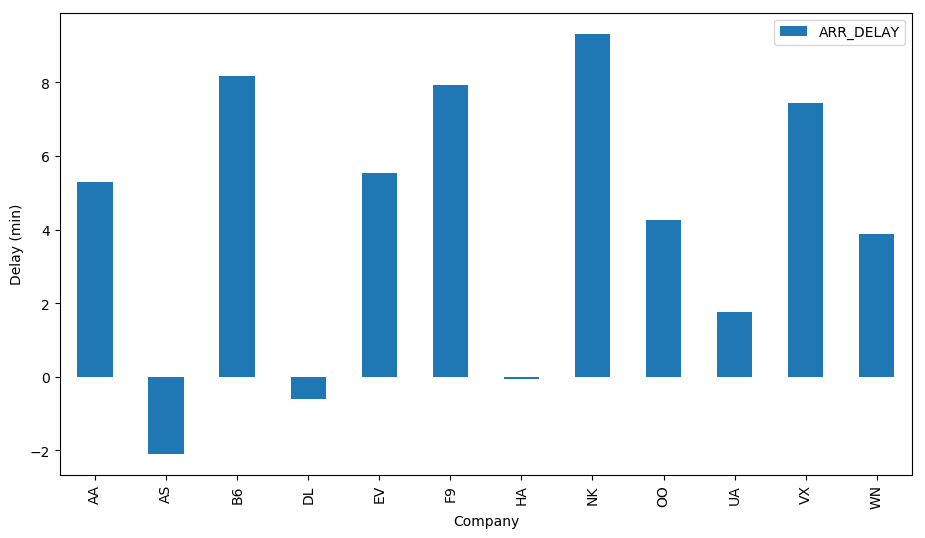

In [26]:
dfgroup = dataraw[['UNIQUE_CARRIER', 'ARR_DELAY']].groupby(['UNIQUE_CARRIER']).mean()
ax = dfgroup.plot.bar(figsize=(11, 6))
ax.set_xlabel("Company")
ax.set_ylabel("Delay (min)")

Il semble y avoir une grande différence entre les compagnies aériennes, le modèle sera bien plus précis si on distingue les compagnies

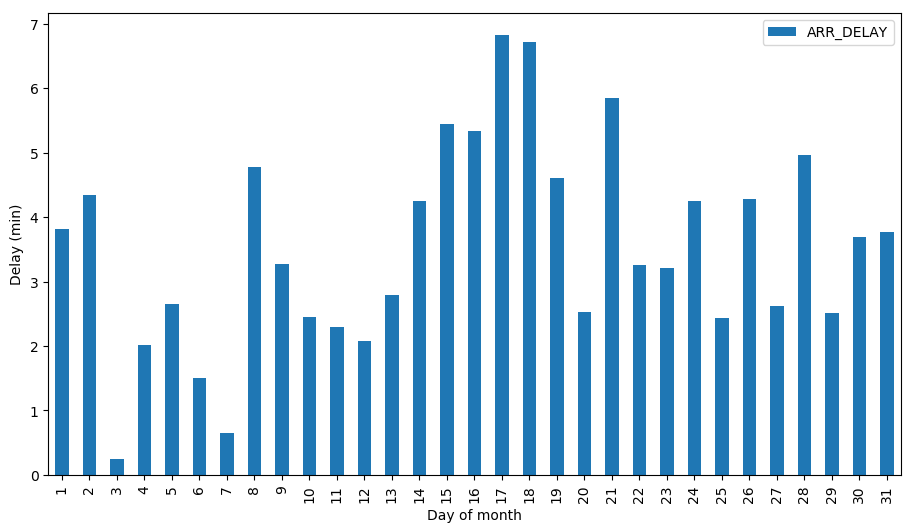

In [25]:
if 'DAY_OF_MONTH' in dataraw.columns:
    dfgroup = dataraw[['DAY_OF_MONTH', 'ARR_DELAY']].groupby(['DAY_OF_MONTH']).mean()
    ax = dfgroup.plot.bar(figsize=(11, 6))
    ax.set_xlabel("Day of month")
    ax.set_ylabel("Delay (min)")

Le jour du mois ne semble pas pertinent comme feature

Text(0,0.5,'Delay (min)')

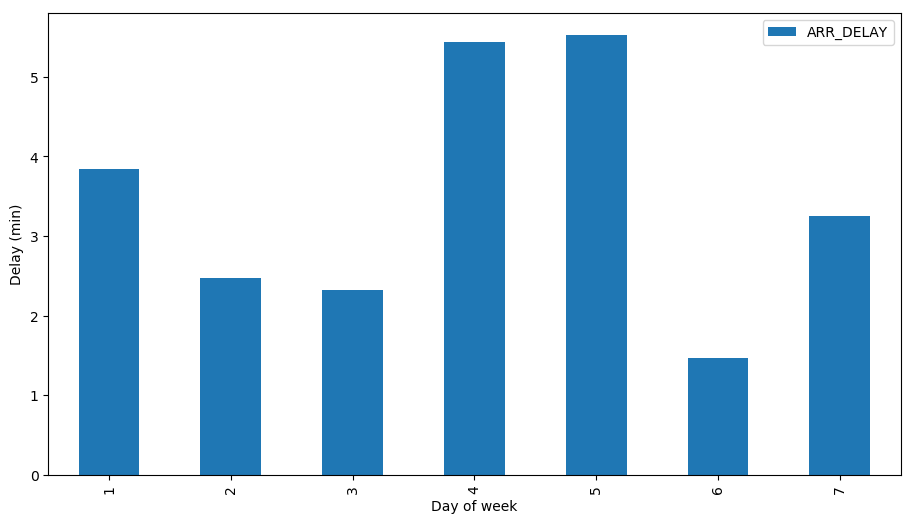

In [27]:
dfgroup = dataraw[['DAY_OF_WEEK', 'ARR_DELAY']].groupby(['DAY_OF_WEEK']).mean()
ax = dfgroup.plot.bar(figsize=(11, 6))
ax.set_xlabel("Day of week")
ax.set_ylabel("Delay (min)")

In [28]:
if 'ARR_HOUR' in dataraw.columns:
    dfgroup = dataraw[['ARR_HOUR', 'ARR_DELAY']].groupby(['ARR_HOUR']).mean()
    ax = dfgroup.plot.bar(figsize=(11, 6))
    ax.set_xlabel("Arrival hour")
    ax.set_ylabel("Delay (min)")

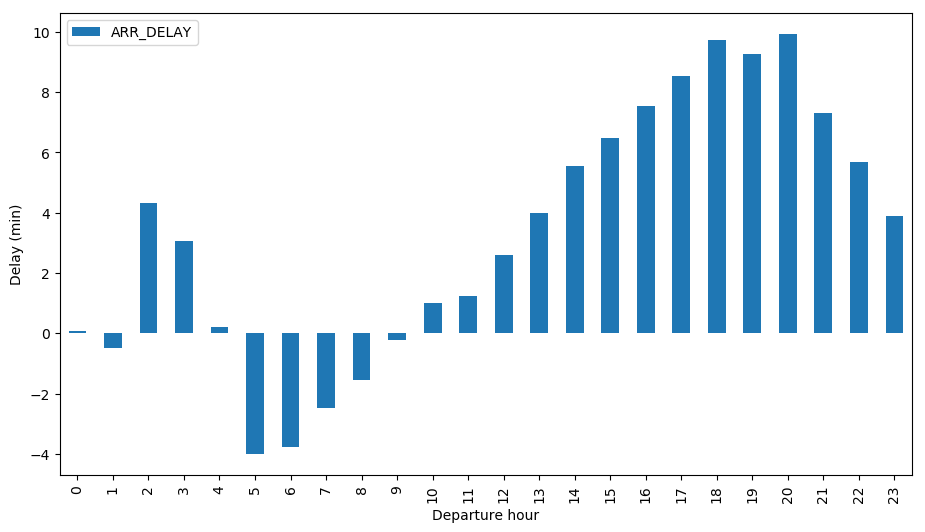

In [29]:
if 'DEP_HOUR' in dataraw.columns:
    dfgroup = dataraw[['DEP_HOUR', 'ARR_DELAY']].groupby(['DEP_HOUR']).mean()
    ax = dfgroup.plot.bar(figsize=(11, 6))
    ax.set_xlabel("Departure hour")
    ax.set_ylabel("Delay (min)")

Le jour de la semaine et l'heure semblent quand même avoir une influence

## Dates et jours fériés

On peut se dire que les longs week-end génèrent du traffic aérien et sont susceptibles de créer des retards, on va donc définir une distance au jour férié le plus proche qui nous servira éventuellement à mesurer une influence. 

In [21]:
# Liste des jours fériés américains en 2016
holidays = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-26']
dfhol = pd.DataFrame({'date' : holidays}, columns = ['date'])
dfhol = pd.to_datetime(dfhol.date)
dfhol

0   2016-01-01
1   2016-01-18
2   2016-02-15
3   2016-05-30
4   2016-07-04
5   2016-09-05
6   2016-10-10
7   2016-11-11
8   2016-11-24
9   2016-12-26
Name: date, dtype: datetime64[ns]

In [22]:
# Méthode qui renvoie la distance au jour férié le plus proche
def DaysToHoliday(month, day):
    dd = datetime.datetime(2016, month, day)
    return (dfhol - dd).abs().min().days

## Préparation et exportation des données

Pour des raisons de mémoire les fichiers vont être traités un par un

In [23]:
def TreatFile(fname):
    print('reading', fname, '...')
    dataraw = pd.read_csv(CT_DIR_DATA + fname + '.csv', error_bad_lines=False)
    # On enlève les annulations (cancellation_code) et les changements de route (diverted)
    dataraw = dataraw[dataraw.DIVERTED==0]
    dataraw = dataraw[dataraw.CANCELLED==0]
    # Nos features
    dataraw = dataraw[featurescols]
    # Pas besoin d'une aussi grande précision, gardons seulement l'heure
    dataraw['DEP_HOUR'] = (dataraw['CRS_DEP_TIME'] / 100).astype(int)
    dataraw = DropCol(dataraw, 'CRS_DEP_TIME')
    # On remet quelques types en numérique pour les calculs
    dataraw.DAY_OF_WEEK = dataraw.DAY_OF_WEEK.astype(np.int)
    dataraw.DAY_OF_MONTH = dataraw.DAY_OF_MONTH.astype(np.int)
    dataraw.ORIGIN_AIRPORT_ID = dataraw.ORIGIN_AIRPORT_ID.astype(np.int)

    # Distance aux jours fériés
    # Faisons une table avec les jours de l'année
    # Ca permet de ne faire le calcul qu'une fois par jour de l'année
    hdaysDF = dataraw[['MONTH', 'DAY_OF_MONTH']].drop_duplicates()
    hdaysDF['HDAYS'] = [DaysToHoliday(int(x[1].MONTH), int(x[1].DAY_OF_MONTH)) for x in hdaysDF.iterrows()]
    print('Days off...')
    def InputDaysOff(month, day):
        return int(hdaysDF[hdaysDF.MONTH==month][hdaysDF.DAY_OF_MONTH==day].HDAYS)

    dataraw['HDAYS'] = list(map(InputDaysOff, dataraw.MONTH, dataraw.DAY_OF_MONTH))

    # Exportation
    print('Export...')
    dataraw.to_csv(CT_DIR_DATA + fname + '_ready.csv', sep="\t", encoding='utf-8', index=False)

In [24]:
for i in range(1, 13):
    n = '2016_%0*d' % (2, i)
    TreatFile(n)

reading 2016_01 ...
Days off...
Export...
reading 2016_02 ...
Days off...
Export...
reading 2016_03 ...


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Days off...
Export...
reading 2016_04 ...


b'Skipping line 121012: expected 65 fields, saw 75\n'
b'Skipping line 386249: expected 65 fields, saw 83\nSkipping line 388291: expected 65 fields, saw 78\nSkipping line 389371: expected 65 fields, saw 72\nSkipping line 389548: expected 65 fields, saw 81\n'
b'Skipping line 453858: expected 65 fields, saw 97\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (0,1,3,4,10,11,13,19,20,21,22,30,36,41,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Days off...


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Export...
reading 2016_05 ...
Days off...
Export...
reading 2016_06 ...
Days off...
Export...
reading 2016_07 ...
Days off...
Export...
reading 2016_08 ...
Days off...
Export...
reading 2016_09 ...
Days off...
Export...
reading 2016_10 ...
Days off...
Export...
reading 2016_11 ...
Days off...
Export...
reading 2016_12 ...
Days off...
Export...


In [30]:
filename = '2016_'
# Récupération du 1er fichier
dataraw = pd.read_csv(CT_DIR_DATA + filename + '01_ready.csv', sep="\t", encoding='utf-8')
print(dataraw.shape)
print(dataraw.columns)

if ALLFILES:
    # Concaténation de toutes les données
    for i in range(2, 13):
        n = CT_DIR_DATA + filename + '%0*d' % (2, i) + '_ready.csv'
        print('reading', n, '...')
        f = pd.read_csv(n, sep="\t", encoding='utf-8')
        print('shape ', f.shape)
        dataraw = dataraw.append(f, ignore_index=True)
        dataraw.index = range(len(dataraw.index))
print(dataraw.shape)


(433298, 9)
Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_CITY_NAME', 'ARR_DELAY', 'DEP_HOUR',
       'HDAYS'],
      dtype='object')
reading C:\Work\OpenClassrooms\data\P4/2016_02_ready.csv ...
shape  (416097, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_03_ready.csv ...
shape  (473286, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_04_ready.csv ...
shape  (474752, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_05_ready.csv ...
shape  (475499, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_06_ready.csv ...
shape  (480916, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_07_ready.csv ...
shape  (491198, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_08_ready.csv ...
shape  (489965, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_09_ready.csv ...
shape  (452558, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_10_ready.csv ...
shape  (467486, 9)
reading C:\Work\OpenClassrooms\data\P4/2016_11_ready.csv ...
shape  (448911, 9)
reading C:\

Text(0,0.5,'Delay (min)')

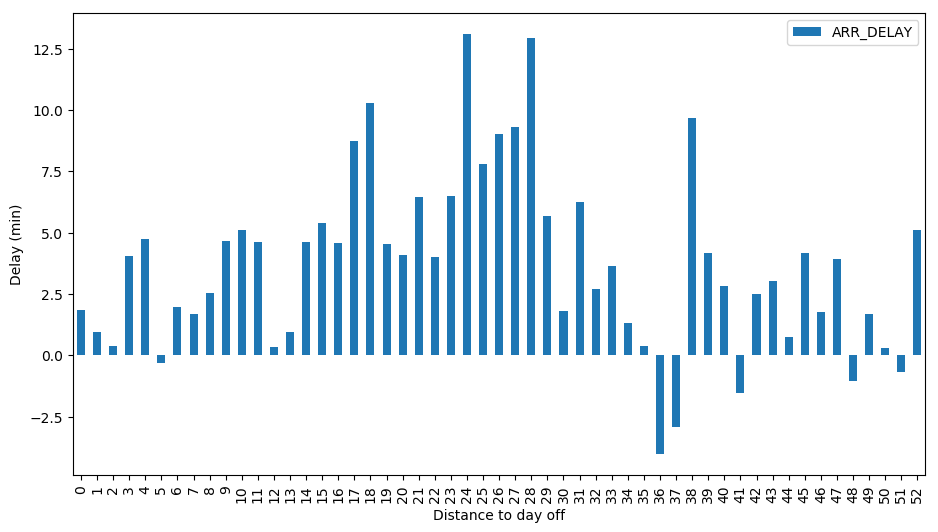

In [31]:
dfgroup = dataraw[['HDAYS', 'ARR_DELAY']].groupby(['HDAYS']).mean()
ax = dfgroup.plot.bar(figsize=(11, 6))
ax.set_xlabel("Distance to day off")
ax.set_ylabel("Delay (min)")

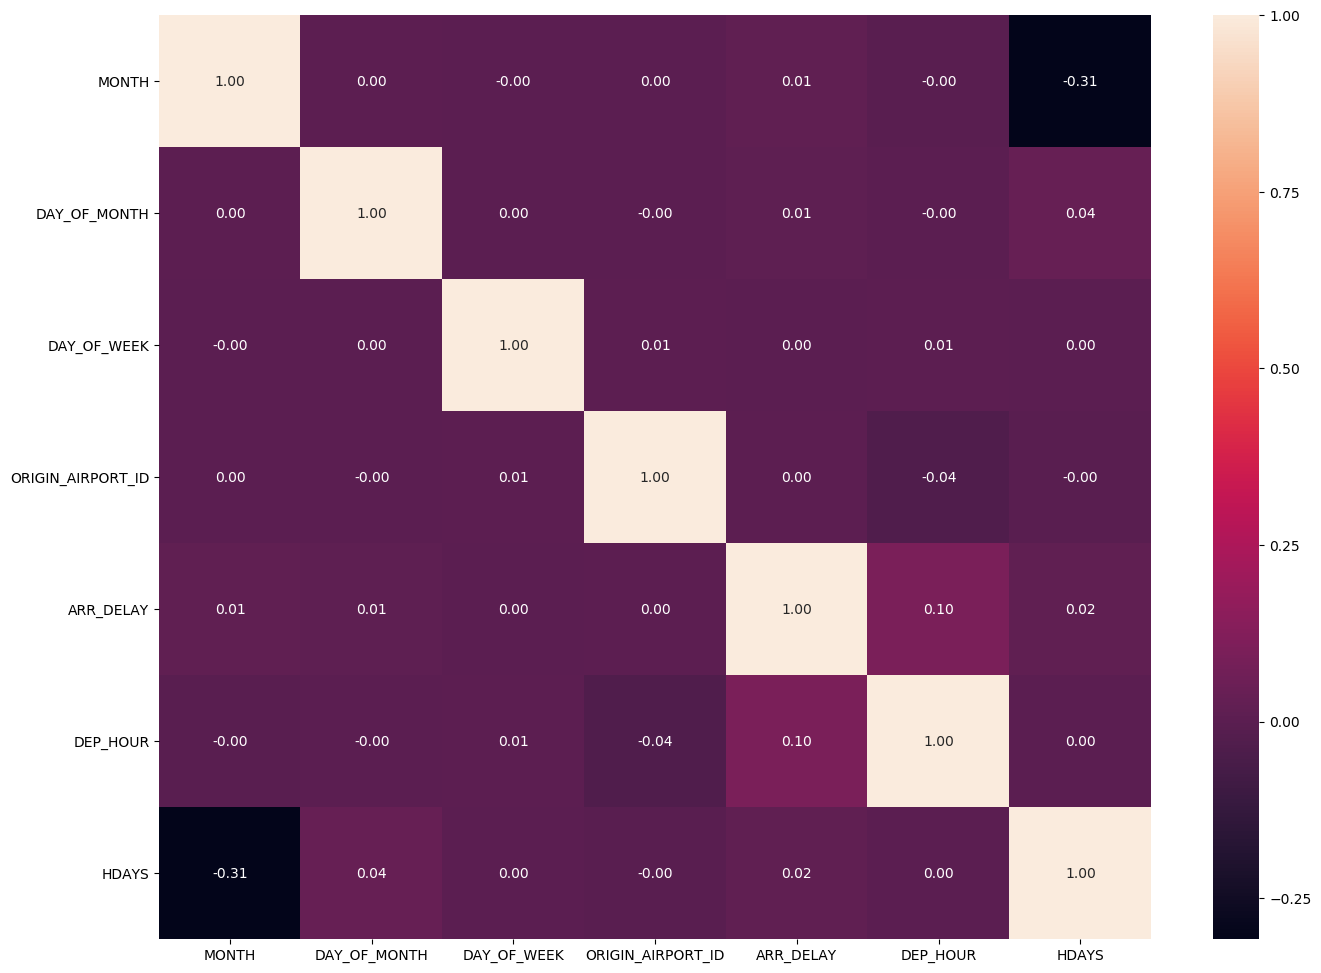

In [32]:
#Correlation Heat Map
plt.figure(figsize=(16, 12))
sns.heatmap(dataraw.corr(), annot = True,fmt = ".2f",cbar = True)
plt.show()